# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets
%matplotlib inline


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# !conda install -c conda-forge nodejs


In [5]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [6]:
# Define transforms
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=16, shuffle=True)

# Create test set and define test dataloader
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=16)


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**Transform** 

Neural networks excepts inputs to be tensors and we normalize these inputs to help the neural network to train faster with mean and standard deviation of 0.5




## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


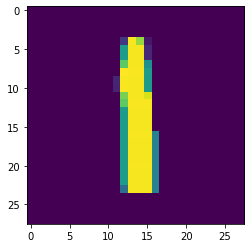

2


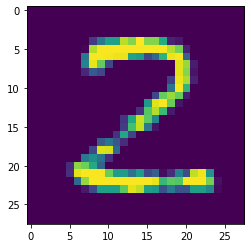

5


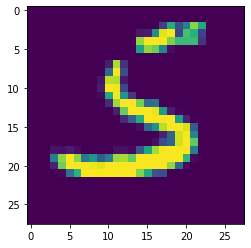

1


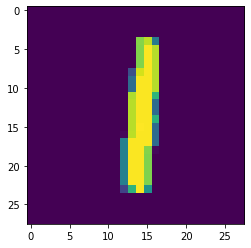

2


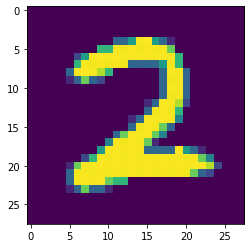

In [8]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
## YOUR CODE HERE ##

class NN_model(nn.Module):
    def __init__(self): 
        super().__init__()
        self.dropout= nn.Dropout(p= 0.25)
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x= self.dropout(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x= self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x, dim=1)  



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##
model = NN_model().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
## YOUR CODE HERE ##

def train_model( net,  num_epochs = 10, learning_rate=0.001): 


    optimizer = optim.Adam(net.parameters(), lr= learning_rate, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()
    

    best_val_loss = float("inf") 
    thresh =0.001
    below_threshold = 0 
    patience = 2
    
    
    train_losses = []
    train_accs= []
    val_losses =[]
    val_accs=[] 
    

    for epoch in range(num_epochs): 
        model.train() 
            
        total_train_samples = 0
        train_loss = 0.0 
        train_correct = 0 


        for images , labels in train_loader: 
    
    
            images = images.to(device)
            labels = labels.to(device)
    
            optimizer.zero_grad() 
    
            outputs = net(images) 
    
            loss = criterion(outputs, labels) 
            loss.backward() 
            optimizer.step() 
    
            _, preds = torch.max(outputs.data, 1)
            
            train_correct+= (preds == labels).sum().item()
            total_train_samples += images.size(0)
            train_loss += loss.item() * images.size(0) 
        train_acc = train_correct / total_train_samples
        train_loss_avg = train_loss / total_train_samples
        train_losses.append(train_loss_avg)
        train_accs.append(train_acc)
    
        
    
        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Loss: {train_loss_avg:.4f}")
        
        
       # Validation 
        model.eval() 
        total_val_samples = 0
        val_loss = 0.0 
        val_correct = 0 
    
        with torch.no_grad():
            
            for images, labels in test_loader:
            
                    images = images.to(device)
                    labels = labels.to (device)
            
                    outputs= model(images)
            
                    loss = criterion(outputs, labels)
            
                    _, preds = torch.max(outputs.data, 1)
                    val_correct+= (preds == labels).sum().item()
                    total_val_samples += images.size(0)
                    val_loss += loss.item() * images.size(0) 
        val_acc = val_correct / total_val_samples
        val_loss_avg = val_loss / total_val_samples
        val_losses.append(val_loss_avg)
        val_accs.append(val_acc)
        
        
            
        print(f"Epoch {epoch+1} - Val Acc: {val_acc:.4f}, Loss: {val_loss_avg:.4f}")

        #Early Stopping
        diff = best_val_loss - val_loss_avg

        if val_loss_avg < best_val_loss:
            best_val_loss = val_loss_avg
            torch.save(model.state_dict(), "best_mnist_model.pth")   #Saving Model Weights 

        if diff <= thresh:
            below_threshold += 1

            if below_threshold >= patience:
                print("Early stopping ")
                break
            
                
                
        else:
            below_threshold = 0 
            
                
    # Plotting after training
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.show()
       
    
    
        

Epoch 1 - Train Acc: 0.8934, Loss: 1.5703
Epoch 1 - Val Acc: 0.9591, Loss: 1.5022
Epoch 2 - Train Acc: 0.9538, Loss: 1.5076
Epoch 2 - Val Acc: 0.9746, Loss: 1.4870
Epoch 3 - Train Acc: 0.9569, Loss: 1.5041
Epoch 3 - Val Acc: 0.9757, Loss: 1.4853
Epoch 4 - Train Acc: 0.9560, Loss: 1.5048
Epoch 4 - Val Acc: 0.9793, Loss: 1.4816
Epoch 5 - Train Acc: 0.9590, Loss: 1.5020
Epoch 5 - Val Acc: 0.9718, Loss: 1.4893
Epoch 6 - Train Acc: 0.9604, Loss: 1.5008
Epoch 6 - Val Acc: 0.9726, Loss: 1.4884
Early stopping 


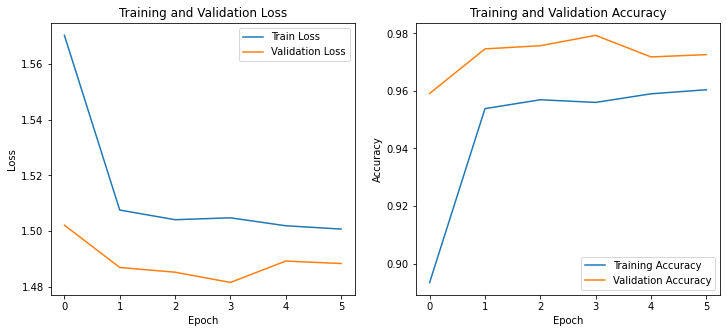

In [12]:
train_model(model)

Plot the training loss (and validation loss/accuracy, if recorded).

In [ ]:
## YOUR CODE HERE ##

## This is fullfilled in the training function 

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
## YOUR CODE HERE ##
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy on test set: {accuracy:.2f}%")
    return accuracy



evaluate_model(model, test_loader)

Accuracy on test set: 97.26%


97.26

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch 1 - Train Acc: 0.9671, Loss: 1.4941
Epoch 1 - Val Acc: 0.9825, Loss: 1.4783
Epoch 2 - Train Acc: 0.9709, Loss: 1.4900
Epoch 2 - Val Acc: 0.9848, Loss: 1.4763
Epoch 3 - Train Acc: 0.9720, Loss: 1.4891
Epoch 3 - Val Acc: 0.9851, Loss: 1.4759
Epoch 4 - Train Acc: 0.9743, Loss: 1.4868
Epoch 4 - Val Acc: 0.9864, Loss: 1.4748
Epoch 5 - Train Acc: 0.9746, Loss: 1.4865
Epoch 5 - Val Acc: 0.9859, Loss: 1.4752
Epoch 6 - Train Acc: 0.9749, Loss: 1.4861
Epoch 6 - Val Acc: 0.9870, Loss: 1.4741
Early stopping 


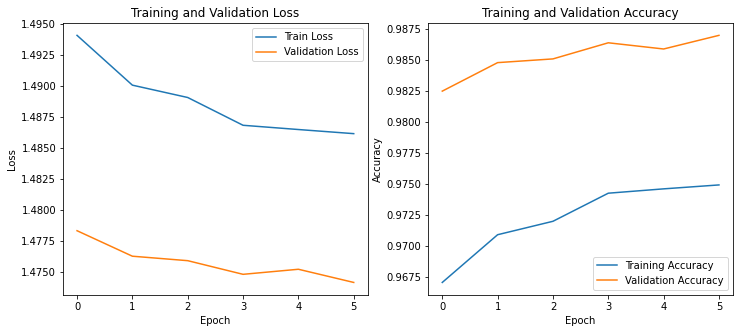

In [15]:
## YOUR CODE HERE ##
train_model(model, 7, 0.0001)


## Saving your model
Using `torch.save`, save your model for future loading.

In [14]:
## YOUR CODE HERE ##
torch.save(model, "mnist_model_full.pth")